In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('..'))


from log_processing import process_log

In [16]:
log_file = "../../backtests/test.log"
trader_data, products_data, activities, trades = process_log(log_file)

In [21]:
# Recorded data
sb2 = products_data["SYNTHETIC_BASKET2"]
sb2_buy_spread = sb2["buy_spread"]
sb2_sell_spread = sb2["sell_spread"]
sb2_zscore_buy = sb2["z_score_buy"]
sb2_zscore_sell = sb2["z_score_sell"]

# Actual data
pb2 = activities[activities["product"] == "PICNIC_BASKET2"].reset_index(drop=True)
cro = activities[activities["product"] == "CROISSANTS"].reset_index(drop=True)
jam = activities[activities["product"] == "JAMS"].reset_index(drop=True)
djem = activities[activities["product"] == "DJEMBES"].reset_index(drop=True)

t = pb2["timestamp"]

In [22]:
buy_spread = pb2["ask_price_1"] - (4 * cro["bid_price_1"] + 2 * jam["bid_price_1"] )
sell_spread = pb2["bid_price_1"] - (4 * cro["ask_price_1"] + 2 * jam["ask_price_1"] )

In [23]:
z_score_buy = (buy_spread - buy_spread.mean()) / buy_spread.std()
z_score_sell = (sell_spread - sell_spread.mean()) / sell_spread.std()

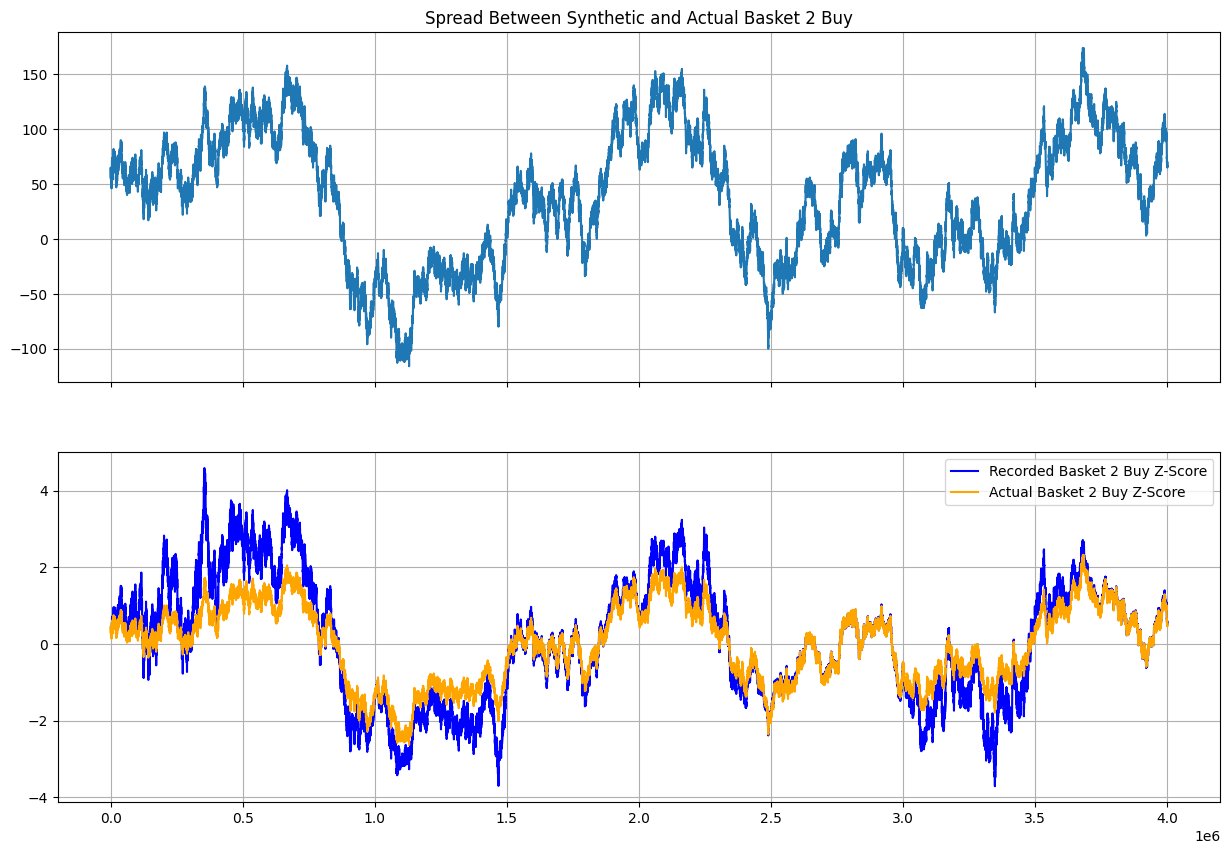

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

axs[0].plot(t, sb2_buy_spread)
axs[0].set_title("Spread Between Synthetic and Actual Basket 2 Buy")
axs[0].grid()

axs[1].plot(t, sb2_zscore_buy, label="Recorded Basket 2 Buy Z-Score", color="blue")
axs[1].plot(t, z_score_buy, label="Actual Basket 2 Buy Z-Score", color="orange")
axs[1].grid()
axs[1].legend()

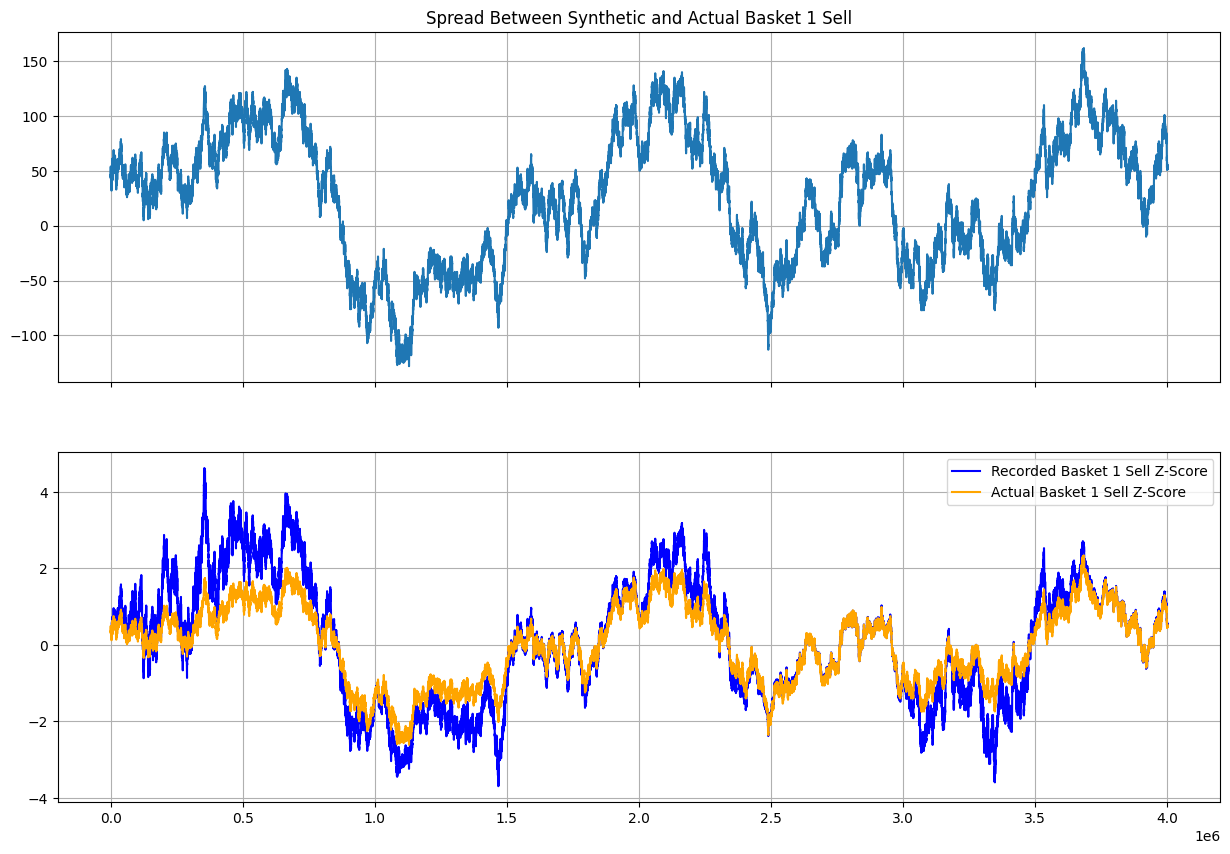

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

axs[0].plot(t, sb2_sell_spread)
axs[0].set_title("Spread Between Synthetic and Actual Basket 1 Sell")
axs[0].grid()

axs[1].plot(t, sb2_zscore_sell, label="Recorded Basket 1 Sell Z-Score", color="blue")
axs[1].plot(t, z_score_sell, label="Actual Basket 1 Sell Z-Score", color="orange")
axs[1].grid()
axs[1].legend()